### Visualising ERA5 Data using Magics

This very first example shows how to download ERA5 Data from the [Copernicus Climate Datastore](https://cds.climate.copernicus.eu/#!/home) 
using the [cdsapi](https://cds.climate.copernicus.eu/api-how-to), and use [Magics](https://confluence.ecmwf.int/display/MAGP/Magics) to visualise the result. 

Steps:
1. Install ecmwflibs (eccodes + magics)
2. Install python magics
3. (Optional) Download from CDS
4. Plot with magics

In [1]:
!pip -q install --user ecmwflibs

In [2]:
!pip -q install --user Magics

In [3]:
!python -m Magics selfcheck

Found: Magics 'Magics 4.13.0'.
Library: /users/staff/mmustermann/.local/lib/python3.9/site-packages/ecmwflibs.libs/libMagPlus-b5529af9.so
Magics home: /users/staff/mmustermann/.local/lib/python3.9/site-packages/ecmwflibs
Your system is ready.


In [4]:
!pip -q install --user cdsapi

In [6]:
import cdsapi

c = cdsapi.Client()

c.retrieve("reanalysis-era5-pressure-levels",
    {
        "variable": "temperature",
        "pressure_level": "1000",
        "product_type": "reanalysis",
        "year": "2008",
        "month": "01",
        "day": "01",
        "time": "12:00",
        "format": "grib"
    },
    "t1000.grib"
)


/users/staff/mmustermann/.local/lib/python3.9/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2024-02-29 16:08:29,467 INFO Welcome to the CDS
2024-02-29 16:08:29,469 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
/users/staff/mmustermann/.local/lib/python3.9/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2024-02-29 16:08:29,619 INFO Request is completed
2024-02-29 16:08:29,620 INFO Downloading https://download-0016.copernicus-climate.eu/cach

Result(content_length=2076600,content_type=application/x-grib,location=https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data1/adaptor.mars.internal-1706428222.4288-13078-11-1b1b05df-f931-47b0-8fe5-a186cdd89a3c.grib)

The data are now ready to be visualised. Here we use an automatic styling. Designed at ECMWF these styles adapted to the parameters to be visualised. We also add a legend and a title, to give more information about the data displayed.

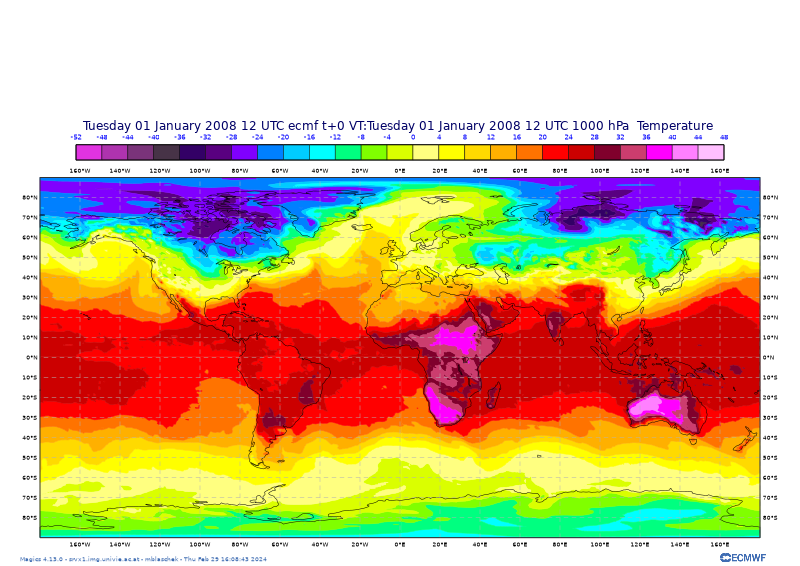

In [7]:
from Magics import macro as magics


data = magics.mgrib(grib_input_file_name = "t1000.grib")

contour = magics.mcont(contour_automatic_setting = 'ecmwf', 
                       legend= True)

legend = magics.mlegend(legend_display_type = 'continuous')
title = magics.mtext()

coastlines = magics.mcoast(map_grid_colour='grey', 
                           map_grid_line_style='dash')

magics.plot(data, contour, coastlines, legend, title)
